In [5]:
import os
import json

import numpy as np
import cv2

from ipynb.fs.full.quantumsystem import qs, System, HyperSystem, IntegerSystem
from ipynb.fs.full.DamageSystem import Armor, UnitDamage
from ipynb.fs.full.MovementSystem import Movement, MovementSpeed, Footprint, Elevation, XYLocation
from ipynb.fs.full.WeaponsSystem import Weapons
from ipynb.fs.full.FactionSystem import Faction

In [2]:
class Size(IntegerSystem):
    """ Size value """

class Skill(IntegerSystem):
    """ Pilot Skill value """

class TMM(IntegerSystem):
    """ Total Movement Modifier """

class Special(System):
    edge_name = "special"

In [3]:
class MechType(System):
    edge_name = "mech_type"

class MechModel(System):
    edge_name = "mech_model"

class MechRole(System):
    edge_name = "mech_role"
    
class PointValue(System):
    edge_name = "point_value"

@PointValue.sd
@Special.sd
@TMM.sd
@Size.sd
@UnitDamage.sd
@Weapons.sd
@MechRole.sd
@MechModel.sd
@MechType.sd
class MechDefinition(HyperSystem):
    """ MechDefinition """

In [4]:
@Faction.sd
@Skill.sd
@Movement.sd
class Unit(HyperSystem):
    """ Unit """

    @classmethod
    def buildOverlay(cls, exclude=None) -> np.array:
        exclude = exclude or []
        entities = [entity for entity in cls.entities() if entity not in exclude]

        overlay = np.zeros([1200, 1200, 1], dtype="uint8")
        for entity in entities:
            footprint = Footprint(entity).terminant
            overlay = cv2.drawContours(overlay, [footprint], -1, 255, -1)
        return overlay

In [5]:
class Chassis(System):
    """ Mech Chassis """

@MechDefinition.sd
@Unit.sd
@Chassis.sd
class Mech(HyperSystem):
    @classmethod
    def get_by_chassis_type(cls, chassisType):
        return [r[0] for r in qs.get(edge_name=[Chassis], terminant=chassisType)]
        
    @classmethod
    def buildMechFactory(cls, systemDefaults):
        def newMechFactory(mechName, faction="Unaligned", skill=4, xylocation=None, footprint=None):
            systemDefaults["Unit"]["Faction"] = faction
            systemDefaults["Unit"]["Skill"] = skill
            systemDefaults["Unit"]["Movement"]["XYLocation"] = xylocation if xylocation is not None else [0, 0]
            systemDefaults["Unit"]["Movement"]["Elevation"] = 0
            systemDefaults["Unit"]["Movement"]["Footprint"] = footprint if footprint is not None else Footprint.example_footprint
            return cls(mechName, **systemDefaults)
        return newMechFactory

    @classmethod
    def active_mechs(cls):
        return [m for m in cls.entities() if not UnitDamage.is_destroyed(entity=m)]

In [7]:
MechFactories = {
    "Kingfisher Prime": Mech.buildMechFactory({
        "Chassis": "Kingfisher Prime",
        "Unit": {
            "Movement": {
                "MovementSpeed": 8,
                "JumpJets": "j",
                "DistanceMoved": 0,
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Faction": "Unaligned",
            "Skill": 4
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Kingfisher Prime",
            "MechRole": "Brawler",
            "Weapons": {
                "ShortRangeWeapons": {"Targeting": {"Modifier": "0", "Damage": "6"}},
                "MidRangeWeapons": {"Targeting": {"Modifier": "2", "Damage": "6"}},
                "LongRangeWeapons": {"Targeting": {"Modifier": "4", "Damage": "3"}},
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {
                "Armor": {"ArmorPlating": "9", "ArmorPlatingDamage": 0, "ArmorStructural": "7", "ArmorStructuralDamage": 0},
                "CriticalHits": {"EngineCriticalHits": "1", "FireControlCriticalHits": "1", "MPCriticalHits": "4", "WeaponsCriticalHits": "4"}
            },
            "Size": "4",
            "TMM": "1",
            "Special": json.dumps(["OMNI", "CASE", "IF01"]),
            "PointValue": "54"
        }
    }),
    "Atlas": Mech.buildMechFactory({
        "Chassis": "Atlas",
        "Unit": {
            "Movement": {
                "MovementSpeed": 6,
                "JumpJets": "null",
                "DistanceMoved": 0,
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Faction": "Unaligned",
            "Skill": 4
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Atlas",
            "MechRole": "Juggernaut",
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": {"Targeting": {"Modifier": "0", "Damage": "4"}},
                "MidRangeWeapons": {"Targeting": {"Modifier": "2", "Damage": "4"}},
                "LongRangeWeapons": {"Targeting": {"Modifier": "4", "Damage": "4"}},
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": {"ArmorPlating": "3", "ArmorPlatingDamage": 0, "ArmorStructural": "8", "ArmorStructuralDamage": 0},
                "CriticalHits":  {"EngineCriticalHits": "1", "FireControlCriticalHits": "1", "MPCriticalHits": "4", "WeaponsCriticalHits": "4"}
            },
            "Size": "4",
            "TMM": "1",
            "Special": json.dumps(["AC2", "IF1", "LRM1", "REAR2"]),
            "PointValue": "52"
        }
    }),
    "Warhawk": Mech.buildMechFactory({
        "Chassis": "Warhawk",
        "Unit": {
            "Movement": {  # Move System
                "MovementSpeed": 8,
                "JumpJets": "null",
                "DistanceMoved": 0,
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Faction": "Unaligned",
            "Skill": 4
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Warhawk",
            "MechRole": "Brawler",
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": {"Targeting": {"Modifier": "0", "Damage": "5"}},
                "MidRangeWeapons": {"Targeting": {"Modifier": "2", "Damage": "5"}},
                "LongRangeWeapons": {"Targeting": {"Modifier": "4", "Damage": "4"}},
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": {"ArmorPlating": "9", "ArmorPlatingDamage": 0, "ArmorStructural": "5", "ArmorStructuralDamage": 0},
                "CriticalHits":  {"EngineCriticalHits": "1", "FireControlCriticalHits": "1", "MPCriticalHits": "4", "WeaponsCriticalHits": "4"}
            },
            "Size": "4",
            "TMM": "1",
            "Special": json.dumps(["ENE", "HT1/1/-", "OMNI"]),
            "PointValue": "52"
        }
    }),
    "Ebon Jaguar": Mech.buildMechFactory({
        "Chassis": "Ebon Jaguar",
        "Unit": {
            "Movement": {  # Move System
                "MovementSpeed": 10,
                "JumpJets": "null",
                "DistanceMoved": 0,
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Faction": "Unaligned",
            "Skill": 4
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Ebon Jaguar",
            "MechRole": "Skirmisher",
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": {"Targeting": {"Modifier": "0", "Damage": "4"}},
                "MidRangeWeapons": {"Targeting": {"Modifier": "2", "Damage": "4"}},
                "LongRangeWeapons": {"Targeting": {"Modifier": "4", "Damage": "2"}},
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": {"ArmorPlating": "7", "ArmorPlatingDamage": 0, "ArmorStructural": "4", "ArmorStructuralDamage": 0},
                "CriticalHits":  {"EngineCriticalHits": "1", "FireControlCriticalHits": "1", "MPCriticalHits": "4", "WeaponsCriticalHits": "4"}
            },
            "Size": "4",
            "TMM": "2",
            "Special": json.dumps(["CASE", "OMNI", "REAR/1/-"]),
            "PointValue": "41"
        }
    }),
    "Turkina": Mech.buildMechFactory({
        "Chassis": "Turkina",
        "Unit": {
            "Movement": {  # Move System
                "MovementSpeed": 6,
                "JumpJets": "j",
                "DistanceMoved": 0,
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Faction": "Unaligned",
            "Skill": 4
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Turkina",
            "MechRole": "Missile Boat",
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": {"Targeting": {"Modifier": "0", "Damage": "5"}},
                "MidRangeWeapons": {"Targeting": {"Modifier": "2", "Damage": "6"}},
                "LongRangeWeapons": {"Targeting": {"Modifier": "4", "Damage": "6"}},
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": {"ArmorPlating": "10", "ArmorPlatingDamage": 0, "ArmorStructural": "5", "ArmorStructuralDamage": 0},
                "CriticalHits":  {"EngineCriticalHits": "1", "FireControlCriticalHits": "1", "MPCriticalHits": "4", "WeaponsCriticalHits": "4"}
            },
            "Size": "4",
            "TMM": "1",
            "Special": json.dumps(["CASE", "OMNI", "REAR/1/-"]),
            "PointValue": "56"
        }
    }),
    "Pouncer": Mech.buildMechFactory({
        "Chassis": "Pouncer",
        "Unit": {
            "Movement": {  # Move System
                "MovementSpeed": 12,
                "JumpJets": "j",
                "DistanceMoved": 0,
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Faction": "Unaligned",
            "Skill": 4
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Pouncer",
            "MechRole": "Scout",
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": {"Targeting": {"Modifier": "0", "Damage": "3"}},
                "MidRangeWeapons": {"Targeting": {"Modifier": "2", "Damage": "3"}},
                "LongRangeWeapons": {"Targeting": {"Modifier": "4", "Damage": "0"}},
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": {"ArmorPlating": "4", "ArmorPlatingDamage": 0, "ArmorStructural": "2", "ArmorStructuralDamage": 0},
                "CriticalHits":  {"EngineCriticalHits": "1", "FireControlCriticalHits": "1", "MPCriticalHits": "4", "WeaponsCriticalHits": "4"}
            },
            "Size": "4",
            "TMM": "2",
            "Special": json.dumps(["CASE", "OMNI", "REAR/1/-"]),
            "PointValue": "29"
        }
    }),
    "Timber Wolf": Mech.buildMechFactory({
        "Chassis": "Timber Wolf",
        "Unit": {
            "Movement": {  # Move System
                "MovementSpeed": 10,
                "JumpJets": "null",
                "DistanceMoved": 0,
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Faction": "Unaligned",
            "Skill": 4
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Timber Wolf",
            "MechRole": "Missile Boat",
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": {"Targeting": {"Modifier": "0", "Damage": "7"}},
                "MidRangeWeapons": {"Targeting": {"Modifier": "2", "Damage": "7"}},
                "LongRangeWeapons": {"Targeting": {"Modifier": "4", "Damage": "4"}},
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": {"ArmorPlating": "8", "ArmorPlatingDamage": 0, "ArmorStructural": "4", "ArmorStructuralDamage": 0},
                "CriticalHits":  {"EngineCriticalHits": "1", "FireControlCriticalHits": "1", "MPCriticalHits": "4", "WeaponsCriticalHits": "4"}
            },
            "Size": "4",
            "TMM": "2",
            "Special": json.dumps(["CASE", "OMNI", "REAR/1/-"]),
            "PointValue": "29"
        }
    }),
}

Movement cost: 0.13441786108771375
Movement cost: 59.13387328335855
Received expected MSV: Cannot move unit further (59.13) than its movement speed (8.00)


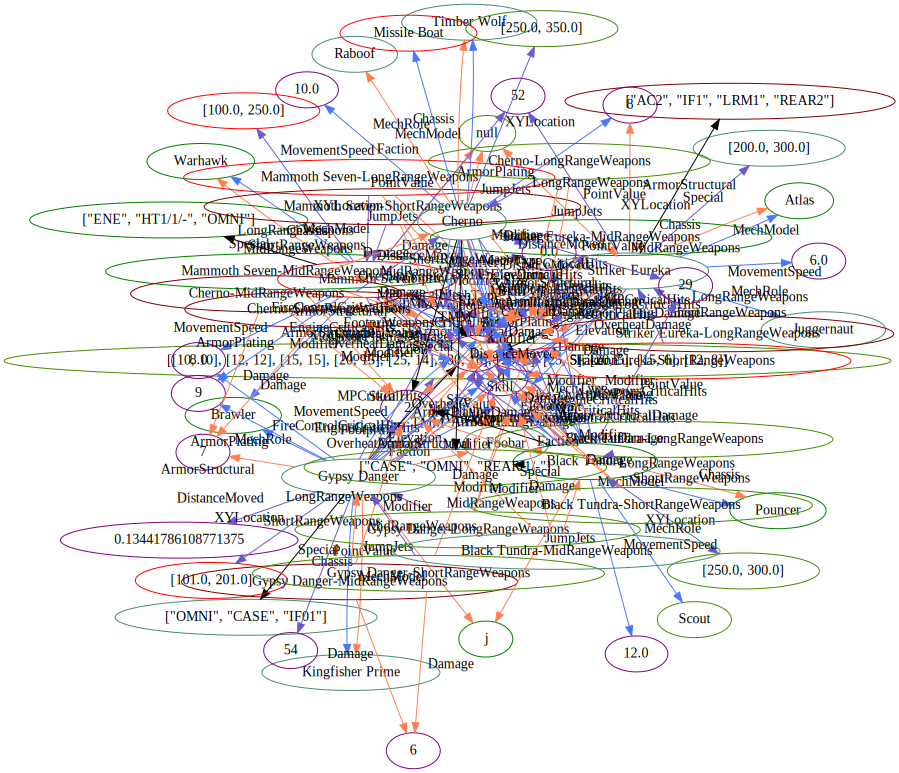

In [8]:
if __name__ == "__main__":
    from IPython.display import display

    qs.reset()
    MechFactories['Kingfisher Prime']("Gypsy Danger", "Foobar", 5, [100, 200])
    MechFactories['Atlas']("Striker Eureka", "Foobar", 5, [200, 300])
    MechFactories['Warhawk']("Mammoth Seven", "Foobar", 5, [100, 250])
    MechFactories['Pouncer']("Black Tundra", "Foobar", 5, [250, 300])
    MechFactories['Timber Wolf']("Cherno", "Raboof", 5, [250, 350])
    Movement.move(entity="Gypsy Danger", delta=[1, 1, 1])
    try:
        Movement.move(entity="Gypsy Danger", delta=[1500, 1, 1])
        raise Exception(f"Failed to raise MovementSpeedViolation!")
    except MovementSpeed.MovementSpeedViolation as msv:
        print(f"Received expected MSV: {msv}")
    assert sorted(Mech.entities()) == ['Black Tundra', 'Cherno', 'Gypsy Danger', 'Mammoth Seven', 'Striker Eureka']
    display(qs.render())